In [1]:
import Pkg
Pkg.add("SimpleCarModels")
Pkg.add("StaticArrays")
Pkg.activate(@__DIR__)
Pkg.instantiate()
# import MathOptInterface as MOI
# import Ipopt 
# import FiniteDiff
# import ForwardDiff
# import Convex as cvx 
# import ECOS
# using LinearAlgebra
using Plots
# using Random
# using JLD2
# using Test
# import MeshCat as mc 
# import SimpleCarModels as scm
# using StaticArrays

In [2]:
include(joinpath(@__DIR__, "utils","fmincon.jl"))
include(joinpath(@__DIR__, "utils","cartpole_animation.jl"))

animate_cartpole (generic function with 1 method)

Size of trajectory: (101,)
(101,)


Plots.AnimatedGif("/home/steven/CMU/16-745_Optimal_Contol_and_RL/project/OCRL-Project-/tmp.gif")
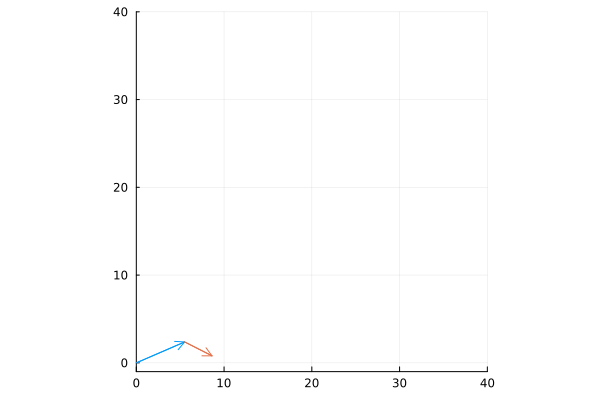

In [10]:
# Function to get the REEDS-SHEPP warm start guess

# Read in the text file

# f = open("test_trajectory_2_1__3_25.txt", "r")
f = open("sideways_trajectory.txt", "r")

traj_text = readlines(f)

println("Size of trajectory: ", size(traj_text))

trajectory = [ones(9,) for k=1:size(traj_text)[1]]

println(size(trajectory))


# Tractor-Trailer Parameters
tractor_wheelbase = 3.0
tractor_hitch_offset = 0.5
trailer_wheelbase = 6.0

function get_tractor_axle_center(state)
    tractor_theta = 0
    global tractor_wheelbase
    global trailer_wheelbase
    global tractor_hitch_offset
    
    
#     if state[4]<=pi
#         tractor_theta = pi - state[4] + (pi/2) #state[3] + (pi - state[4]);
#     else
#         tractor_theta = (pi/2) - (pi - state[4]) #+ (pi/2) #state[3] + (pi - state[4]);
#     end
    
    tractor_theta = pi - state[4] + state[3]
    
    if state[4]>2*pi
        println("NEGATIVE")
    end

#     tractor_theta = (state[3] - (pi - abs(state[4]))); 
        
    x = state[1] + trailer_wheelbase*cos(state[3]) + tractor_hitch_offset*cos(tractor_theta);
    y = state[2] + trailer_wheelbase*sin(state[3]) + tractor_hitch_offset*sin(tractor_theta);
    z = state[1] + trailer_wheelbase*cos(state[3])
    a = state[2] + trailer_wheelbase*sin(state[3])
        
    return z, a, tractor_theta
end

for i=1:size(trajectory)[1]
    vals = split(traj_text[i], ", ")
#     trajectory[1] = 
#     println([vals[1][2:end], vals[2], vals[3], vals[4], vals[5], vals[6][1:end-1]])
    trajectory[i][1] = parse(Float64, vals[1][2:end])
    trajectory[i][2] = parse(Float64, vals[2])
    trajectory[i][3] = parse(Float64, vals[3])
    trajectory[i][4] = parse(Float64, vals[4])
    trajectory[i][5] = parse(Float64, vals[5])
    trajectory[i][6] = parse(Float64, vals[6][1:end-1])
        
    trajectory[i][7], trajectory[i][8], trajectory[i][9]  =  get_tractor_axle_center(trajectory[i])
#     println(trajectory[i])
#     println(vals)
end



# tractor_wheelbase = 3.0
# tractor_hitch_offset = 0.5
# trailer_wheelbase = 6.0


@gif for i in 1:size(trajectory)[1]
    quiver([trajectory[i][1]], [trajectory[i][2]], quiver=([trailer_wheelbase*cos(trajectory[i][3])],[trailer_wheelbase*sin(trajectory[i][3])]), ylimits=(-1,40),
    xlimits=(0,40), aspect_ratio=:equal)
    quiver!([trajectory[i][7]], [trajectory[i][8]], quiver=([(tractor_wheelbase + tractor_hitch_offset)*cos(trajectory[i][9])],[(tractor_wheelbase + tractor_hitch_offset)*sin(trajectory[i][9])]), ylimits=(-1,40),
    xlimits=(0,40), aspect_ratio=:equal)
#     plot([all_x2[i-k:i]],[all_y2[i-k:i]], c=:red, seriestype = :scatter)
#     plot!([all_x1[i-k:i]],[all_y1[i-k:i]], c=:blue, seriestype = :scatter)
end every 1





